In [ ]:
# Special credit to Statsbomb for publicly releasing Bayer Leverkusen's 2023-2024 season data
# Load in the prebuilt packages which accesses APIs and libraries to streamline subsequent coding
!pip install statsbombpy
!pip install mplsoccer

In [2]:
from statsbombpy import sb
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations (though not used directly in this snippet)
from mplsoccer import Pitch, Sbopen, VerticalPitch  # For creating a soccer pitch and handling soccer data
import pandas as pd  # For working with dataframes

In [3]:
# To access specific event data we can get all relevant match IDs, then get events from specific matches
sb.matches(competition_id = 9, season_id = 281) 
sb.events(match_id = 3895302)

,50_50,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",Bayer Leverkusen,904,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 352, 'lineup': [{'player': {'id'...",Werder Bremen,176,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Werder Bremen,176,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Werder Bremen,176,00:01:04.682,Bad Behaviour,NaN
4219,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bayer Leverkusen,904,00:01:05.939,Bad Behaviour,NaN
4220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",Bayer Leverkusen,904,00:23:47.066,Tactical Shift,NaN
4221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 352, 'lineup': [{'player': {'id'...",Werder Bremen,176,00:31:46.845,Tactical Shift,NaN


In [4]:
# When analyzing the entire seasonal data metrics, we instead use sb.competition_events(), NOTE: only desriptive arguments work here
all_events = sb.competition_events(
    country = "Germany",
    division = "1. Bundesliga",
    season = "2023/2024",
    gender = "male",
    split = True # Is a dictionary if split = True, as separate columns are created
    # If split = False, its a dataframe -> Useful for things like relationship between event types (Eg. pass and shots), all events by one player, EDA where everythings in one place
)
print(all_events.keys()) # .columns for dataframes, .keys() for dictionaries

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'miscontrols', 'dribbles', 'duels', 'interceptions', 'ball_recoverys', 'dispossesseds', 'blocks', 'foul_committeds', 'foul_wons', 'errors', 'shots', 'goal_keepers', 'injury_stoppages', 'referee_ball_drops', '50/50s', 'clearances', 'offsides', 'dribbled_pasts', 'player_offs', 'player_ons', 'half_ends', 'substitutions', 'bad_behaviours', 'tactical_shifts', 'shields', 'own_goal_fors', 'own_goal_againsts'])


In [5]:
# Filter all shots
shots_df = pd.DataFrame(all_events["shots"])
shots_df = shots_df[shots_df["possession_team"] == "Bayer Leverkusen"]
shots_df = shots_df[shots_df["team"] == "Bayer Leverkusen"]

# Create new timestamp based on seconds 
shots_df["timestamp_seconds"] = shots_df["minute"] * 60 + shots_df["second"] 

shots_df.reset_index(drop = True, inplace = True) # Repositions the index into 0,1,2,3 etc.
shots_df.columns

Index(['id', 'index', 'period', 'timestamp', 'minute', 'second', 'type',
       'possession', 'possession_team', 'play_pattern', 'team', 'player',
       'position', 'location', 'duration', 'related_events', 'match_id',
       'shot_statsbomb_xg', 'shot_end_location', 'shot_first_time',
       'shot_technique', 'shot_body_part', 'shot_type', 'shot_outcome',
       'shot_freeze_frame', 'possession_team_id', 'team_id', 'player_id',
       'under_pressure', 'shot_key_pass_id', 'shot_aerial_won',
       'shot_one_on_one', 'shot_deflected', 'out', 'shot_open_goal',
       'shot_saved_off_target', 'shot_saved_to_post', 'off_camera',
       'timestamp_seconds'],
      dtype='object')

In [6]:
# shots_df[['play_pattern', 'shot_statsbomb_xg', 'shot_body_part', 'shot_outcome']].head(50)

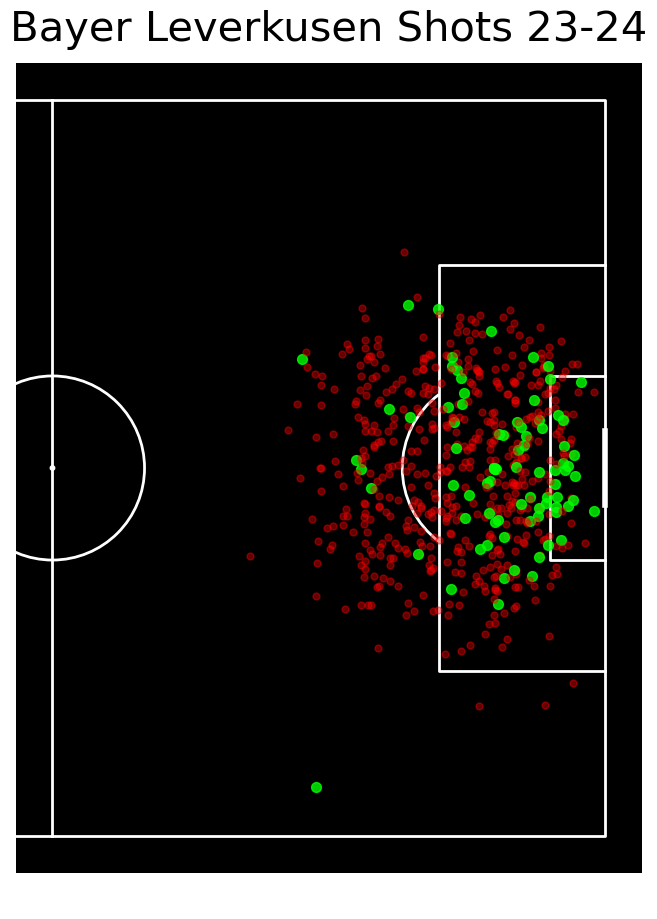

In [7]:
# Simple plot of all shots during the season, marking the goals in green

pitch = Pitch(line_color = 'white', pitch_color = 'black', half = True)
fig, ax = pitch.grid(grid_height = 0.9, title_height = 0.06, axis = False, endnote_height = 0.04, title_space = 0, endnote_space = 0) 

# Extracting the x and y coordinates into new columns, from the location column of shots_df
shots_df.loc[:, 'x'] = shots_df['location'].apply( # Preparing to extract x coordinate of location column and assign it to a new column x 
    lambda loc: loc[0] if isinstance(loc, list) and len(loc) > 0 else None) # If its a list and also not empty, then extract first element (x coordinate)
    # lambda functions (AKA anonymous functions) are small, one off and don't need a name 
shots_df.loc[:, 'y'] = shots_df['location'].apply( # Apply processes your function to each row, no need for loops in Python
    lambda loc: loc[1] if isinstance(loc, list) and len(loc) > 1 else None) # Ensures there are 2 elements to access so u can get the loc[1]

# Loop through the dataframe to plot each shot onto the pitch
for i, row in shots_df.iterrows(): # The i isn't actually being used here, just a placeholder! Interrows allows u to perform more specific actions to each row (vs apply), usually used in plotting
    if pd.notnull(row["x"]) and pd.notnull(row["y"]):
        if row["shot_outcome"] == 'Goal': 
            pitch.scatter(row.x, row.y, alpha = 0.8, s = 50, color = "lime", ax = ax['pitch']) 
        else: # Shot did not result in a goal
            pitch.scatter(row.x, row.y, alpha = 0.4, s = 25, color = "red", ax = ax['pitch']) 

# Add titles and subtitles
fig.suptitle("Bayer Leverkusen Shots 23-24", fontsize = 30, y = 1) 
plt.show() # Magic button!

In [8]:
print(all_events.keys())

dict_keys(['starting_xis', 'half_starts', 'passes', 'ball_receipts', 'carrys', 'pressures', 'miscontrols', 'dribbles', 'duels', 'interceptions', 'ball_recoverys', 'dispossesseds', 'blocks', 'foul_committeds', 'foul_wons', 'errors', 'shots', 'goal_keepers', 'injury_stoppages', 'referee_ball_drops', '50/50s', 'clearances', 'offsides', 'dribbled_pasts', 'player_offs', 'player_ons', 'half_ends', 'substitutions', 'bad_behaviours', 'tactical_shifts', 'shields', 'own_goal_fors', 'own_goal_againsts'])


In [9]:
# Concat all events which result in direct possession switches to Bayer Leverkusen from open play

miscontrols_df = pd.DataFrame(all_events["miscontrols"])
dispossesseds_df = pd.DataFrame(all_events["dispossesseds"])
interceptions_df = pd.DataFrame(all_events["interceptions"])
duels_df = pd.DataFrame(all_events["duels"])
fiftyfifties_df = pd.DataFrame(all_events["50/50s"])
ball_recoverys_df = pd.DataFrame(all_events["ball_recoverys"])
dribbles_df = pd.DataFrame(all_events["dribbles"])

# Filter failed duels, 50/50s, ball recoverys, dribbles which result in succesful possession switches where the ball stays in play
lost_duels_df = duels_df[duels_df["duel_outcome"] == "Lost In Play"]
fiftyfifties_df["outcome_name"] = fiftyfifties_df["50_50"].apply( # Special case -> need to extract the name field from nested dictionary, make new column for outcome
    lambda x: x["outcome"]["name"] if pd.notnull(x) else None
)
lost_fiftyfifties_df = fiftyfifties_df[fiftyfifties_df["outcome_name"] == "Lost"]
lost_ball_recoverys_df = ball_recoverys_df[(ball_recoverys_df["ball_recovery_recovery_failure"] == True) & (ball_recoverys_df["out"] != True)]
lost_dribbles_df = dribbles_df[dribbles_df["dribble_outcome"] == "Incomplete"]

# Filter for succesful interceptions
won_interceptions_df = interceptions_df[(interceptions_df["interception_outcome"] == "Won") | (interceptions_df["interception_outcome"] == "Success In Play")]

# Concat with filtered conditions, adding in dispossessions and miscontrols
turnover_events_df = pd.concat([
    lost_duels_df,
    fiftyfifties_df,
    lost_ball_recoverys_df,
    lost_dribbles_df,
    won_interceptions_df,
    miscontrols_df,
    dispossesseds_df
])

# Filter for turnover cases where opposition team has possession
turnover_events_df = turnover_events_df[turnover_events_df["possession_team"] != "Bayer Leverkusen"] 
turnover_events_df = turnover_events_df[turnover_events_df["team"] != "Bayer Leverkusen"]

# Create new timestamp based on seconds 
turnover_events_df["timestamp_seconds"] = turnover_events_df["minute"] * 60 + turnover_events_df["second"] 

turnover_events_df.reset_index(drop = True, inplace = True) 
turnover_events_df

# # Group related "follow-up" turnover events and keep the latest timed event
# # Function which checks if 'related events' is a single ID or a list, filter accordingly
# target_id = "dd44c91c-eec5-49df-be0e-2fb7c602ed6b"
# def check_related_events(row, target_id):
#     if isinstance(row, list):
#         return target_id in row
#     return target_id == row

# unique_events_df = turnover_events_df[turnover_events_df["related_events"].apply(
#     lambda x: check_related_events(x, target_id)
# )]

# expanded_df = unique_events_df.explode("related_events")
# print(expanded_df["related_events"].head())

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,outcome_name,ball_recovery_recovery_failure,ball_recovery_offensive,dribble_outcome,dribble_nutmeg,dribble_overrun,dribble_no_touch,interception_outcome,miscontrol_aerial_won,timestamp_seconds
0,2c62f4ea-1200-4740-becd-5187438bbfd5,3877,2,00:53:23.743,98,23,Duel,153,Borussia Dortmund,From Kick Off,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5903
1,074d6da3-d686-45f2-871f-4a16bd199000,493,1,00:08:46.188,8,46,50/50,18,Werder Bremen,Regular Play,...,Lost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,526
2,8a87aa0a-d92d-4d6a-8428-347efbcd4d5f,1219,1,00:30:06.599,30,6,50/50,53,Union Berlin,Regular Play,...,Success To Team,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1806
3,77aaa350-9113-4a0c-931a-02f11d499ece,131,1,00:03:25.065,3,25,50/50,11,Bochum,Regular Play,...,Lost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205
4,66ef4378-4d21-498d-8964-79878a61c950,252,1,00:07:51.066,7,51,50/50,18,Bochum,Regular Play,...,Won,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,b49e601c-cb67-4a6d-a8f2-cfaec2cbb4aa,1653,1,00:40:31.896,40,31,Dispossessed,74,RB Leipzig,Regular Play,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2431
947,11084742-4632-4565-be64-d8b639a0dbf7,1678,1,00:41:42.985,41,42,Dispossessed,78,RB Leipzig,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2502
948,8b235600-e685-43fb-a9a6-3a6f12e93874,2020,2,00:01:57.295,46,57,Dispossessed,100,RB Leipzig,From Throw In,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2817
949,c1122ca7-677d-496d-b921-62ffb2fa919f,2350,2,00:11:27.072,56,27,Dispossessed,115,RB Leipzig,From Free Kick,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3387


In [10]:
# Shots that occur within x seconds of a turnover event for Bayer Leverkusen, by merging on match_id 
turnover_shots_df = pd.merge(
    turnover_events_df,
    shots_df,
    on = ["match_id"],
    suffixes = ('_turnover', '_shot'),
    how = 'inner'# Not left join as we don't include the matches with invalid or no shots in a game
)

# Sort by match_id and turnover timestamp, so we can find the last turnover before a shot -> Important that match_id is sorted first
turnover_shots_df = turnover_shots_df.sort_values(by = ["match_id", "timestamp_seconds_turnover"])

# For each shot, find the most recent turnover that happened before the shot -> add a new column with the timestamp of that last turnover
# We need to compare the turnover timestamp to each shot's timestamp within the same match
def get_last_turnover(group): # Group is the subset of the Dataframe containing all the rows (turnovers and shots) for a single match
    group['last_turnover_before_shot'] = group.apply(
        # DETAILED EXPLANATION: Group's data points originally contains either timestamp_seconds_turnover or timestamp_seconds_shot but not both
        # for the same data point. The function goes through each row (which is essentially each shot data point) and compares it to all the preceding
        # turnover data points in "group", saving the last turnover into each shot row. The result we return a "group" which now has every shot data 
        # point having the most recent turnover timestamp in the new last_turnover_before_shot column.
        # TEMPLATE: lambda <input>: <dataframe>[<filtering condition>]['<column>'].max()
        lambda row: group[group['timestamp_seconds_turnover'] < row['timestamp_seconds_shot']]['timestamp_seconds_turnover'].max(),
        axis = 1 # Means apply the function to each row, not column (axis = 0)
    )
    return group

# Apply the function to each match_id group
turnover_shots_df = turnover_shots_df.groupby('match_id').apply(get_last_turnover) # Ensures we apply the function SEPARATELY to each match

# Now filter to keep only the rows where the turnover timestamp matches the last turnover before the shot, hence dropping all the non-last turnovers connected to the same shot
turnover_shots_df = turnover_shots_df[turnover_shots_df['timestamp_seconds_turnover'] == turnover_shots_df['last_turnover_before_shot']]

# Drop the helper column for clarity -> The values are the exact same as the timestamp_seconds_turnover column atm
turnover_shots_df = turnover_shots_df.drop(columns = ["last_turnover_before_shot"])

turnover_shots_df.reset_index(drop = True, inplace = True) 
turnover_shots_df['type_turnover']
# turnover_shots_df.columns

0        Miscontrol
1      Interception
2           Dribble
3           Dribble
4           Dribble
           ...     
598    Interception
599      Miscontrol
600      Miscontrol
601      Miscontrol
602      Miscontrol
Name: type_turnover, Length: 603, dtype: object

In [11]:
# Function which plots the shots and associated turnover location within x seconds of regaining possession 
def plot_turnover_shots(df, df_name):
    # Create a pitch
    pitch = Pitch(line_color='white', pitch_color='black')
    
    # Create figure
    fig, ax = pitch.draw(figsize=(12, 8)) # Matches statsbomb's locational data of 120 x 80 (aspect ratio)
    
    # Define event types and their corresponding colors
    event_types = {
        "Goal": ("green", "Goal"),
        "Shot (No goal)": ("red", "Shot (No goal)"),
        "Turnover (led to Goal)": ("lime", "Turnover (led to Goal)"),
        "Turnover (led to Shot)": ("pink", "Turnover (led to Shot)")
    }
    
    # Add legend entries first (ensures they always appear)
    for color, label in event_types.values():
        pitch.scatter([], [], ax = ax, color = color, s = 100, edgecolors = 'white', label = label)
    
    # Plot resulting shots and highlight goals
    for i, row in df.iterrows():
        if isinstance(row["location_shot"], list) and len(row["location_shot"]) == 2:
            x, y = row["location_shot"]
            color, _ = event_types["Goal"] if row["shot_outcome"] == "Goal" else event_types["Shot (No goal)"]
            pitch.scatter(x, y, ax = ax, color = color, s = 100, edgecolors = 'white')

    # Plot turnovers leading to shots
    for i, row in df.iterrows():
        if isinstance(row["location_turnover"], list) and len(row["location_turnover"]) == 2:
            x, y = row["location_turnover"]
            # Switch from opposition's "possession" perspective to Bayer Leverkusen's perspective
            x_inverted = 120 - x
            y_inverted = 80 - y
            color, _ = event_types["Turnover (led to Goal)"] if row["shot_outcome"] == "Goal" else event_types["Turnover (led to Shot)"]
            pitch.scatter(x_inverted, y_inverted, ax = ax, color = color, s = 100, edgecolors = 'white')

    # Add title and legend
    plt.title(f"{df_name} Following Turnover Events by Bayer Leverkusen", fontsize = 20)
    plt.legend(loc = 'upper left')
    
    plt.show()


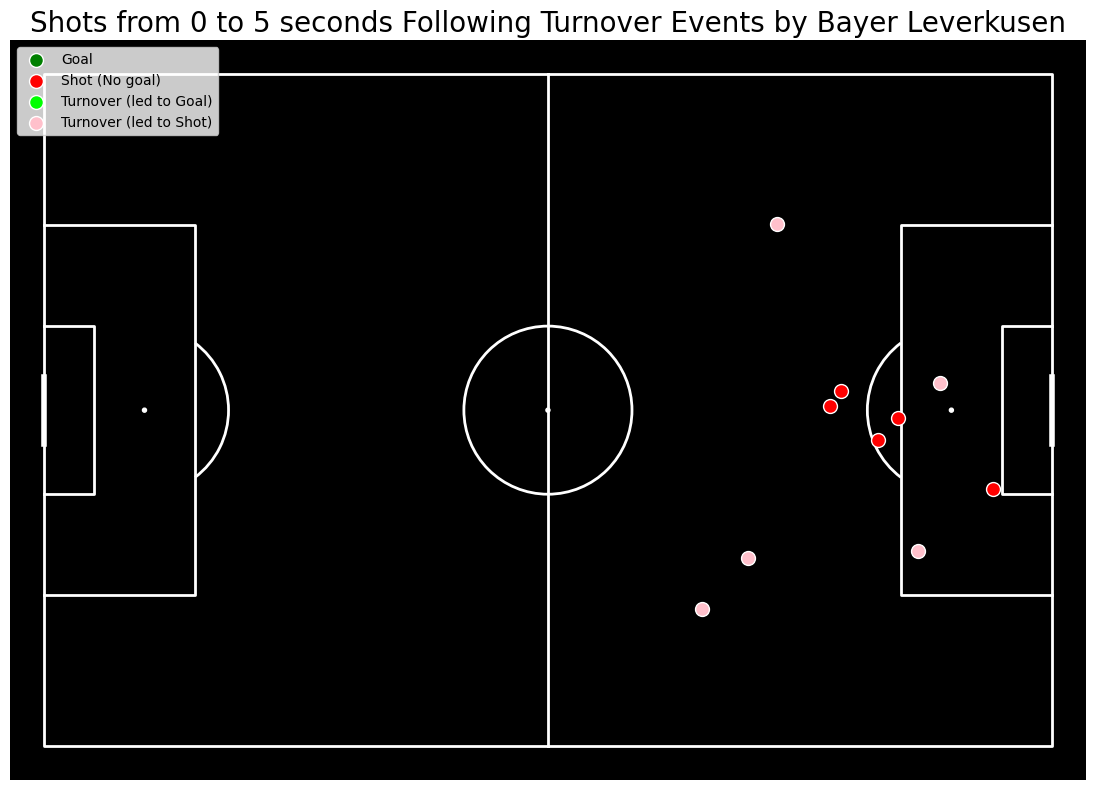

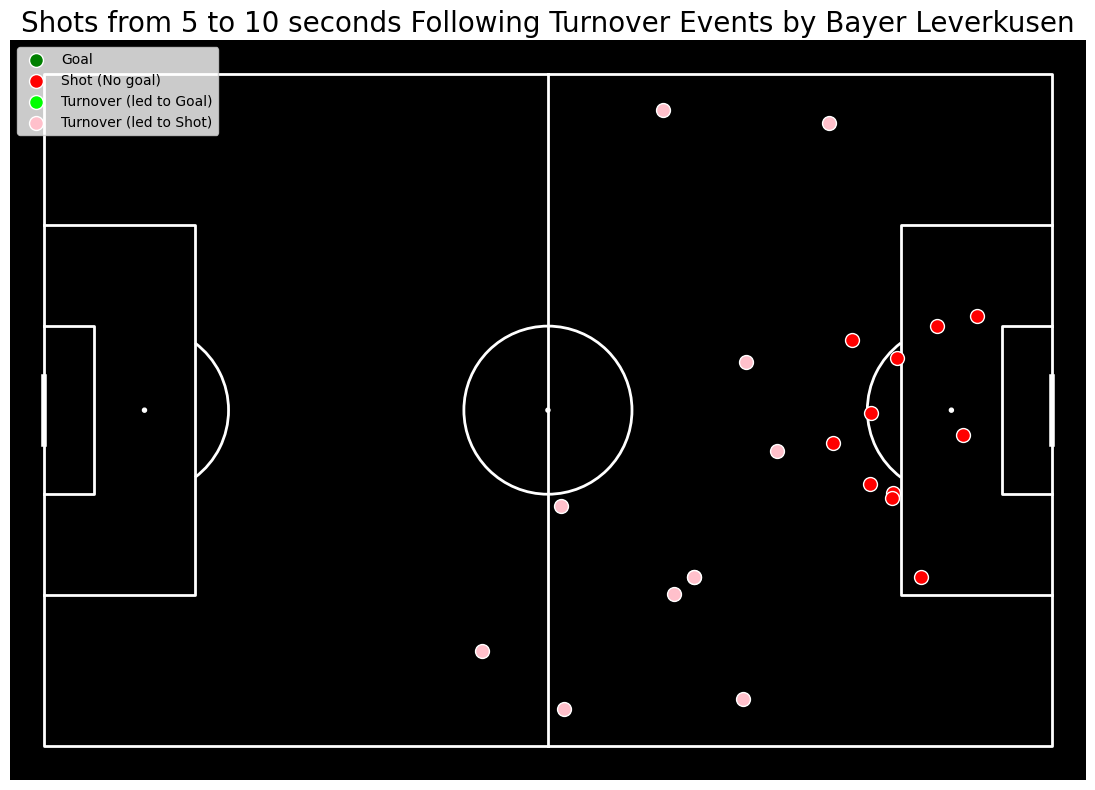

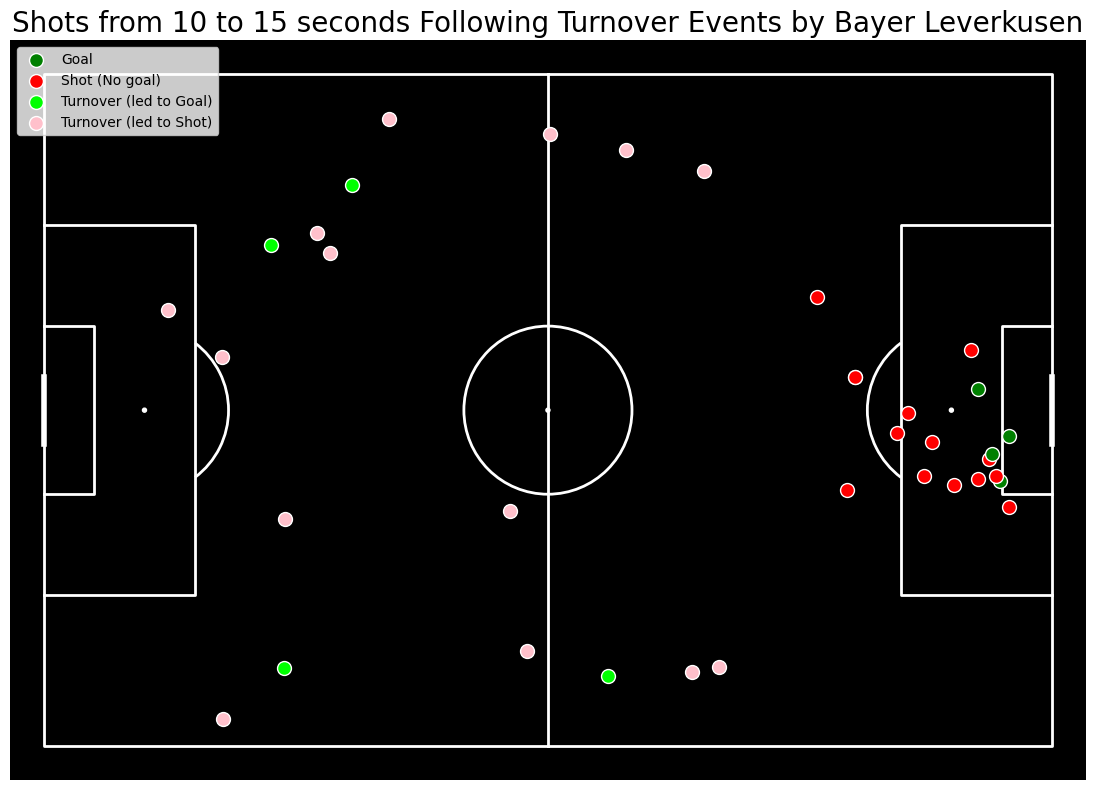

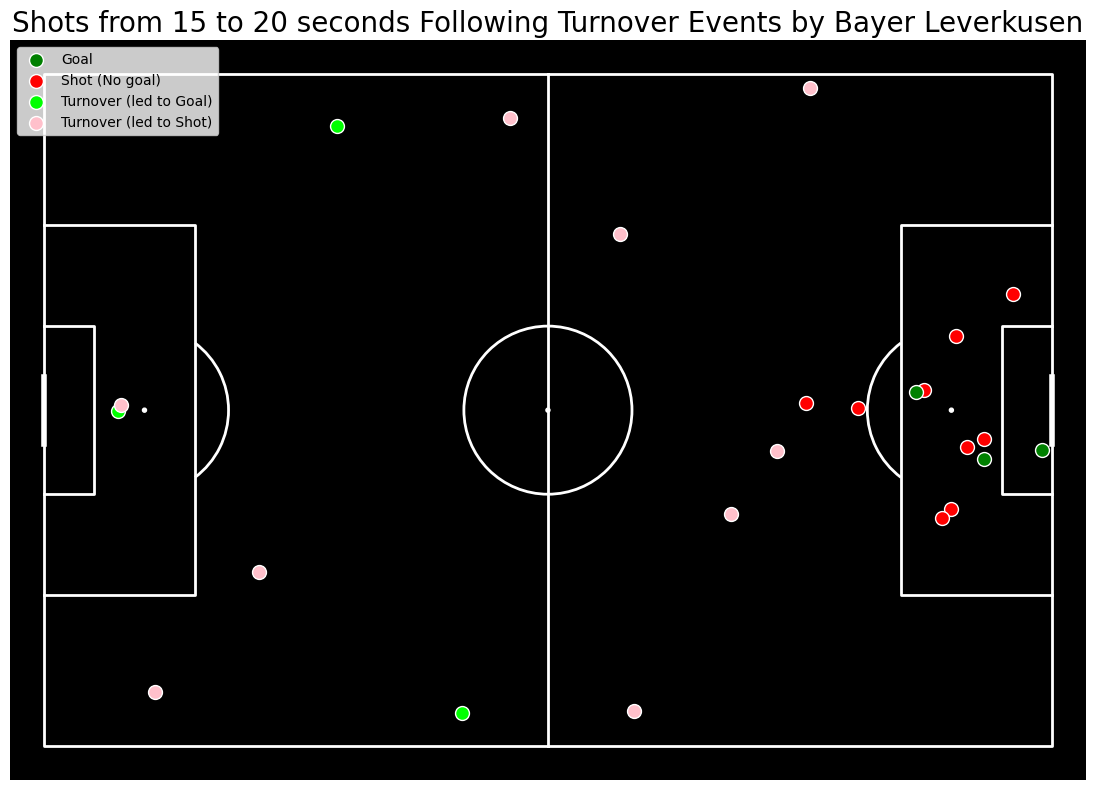

In [12]:
# Calculate time difference from turnover to shot, as new column
turnover_shots_df["time_diff"] = turnover_shots_df["timestamp_seconds_shot"] - turnover_shots_df["timestamp_seconds_turnover"] 

# Filter for shots within 5 seconds of a turnover
shots_from_0_to_5sec = turnover_shots_df[
    (turnover_shots_df["time_diff"] >= 0) & (turnover_shots_df["time_diff"] < 5)
]
shots_from_0_to_5sec.reset_index(drop = True, inplace = True)
    
# Filter for shots from 5 to 10 seconds of a turnover
shots_from_5_to_10sec = turnover_shots_df[
    (turnover_shots_df["time_diff"] >= 5) & (turnover_shots_df["time_diff"] < 10)
]
shots_from_5_to_10sec.reset_index(drop = True, inplace = True)

# Filter for shots from 10 to 15 seconds of a turnover
shots_from_10_to_15sec = turnover_shots_df[
    (turnover_shots_df["time_diff"] >= 10) & (turnover_shots_df["time_diff"] < 15)
]
shots_from_10_to_15sec.reset_index(drop = True, inplace = True)

# Filter for shots from 15 to 20 seconds of a turnover
shots_from_15_to_20sec = turnover_shots_df[
    (turnover_shots_df["time_diff"] >= 15) & (turnover_shots_df["time_diff"] < 20)
]
shots_from_15_to_20sec.reset_index(drop = True, inplace = True)


plot_turnover_shots(shots_from_0_to_5sec, "Shots from 0 to 5 seconds")
plot_turnover_shots(shots_from_5_to_10sec, "Shots from 5 to 10 seconds")
plot_turnover_shots(shots_from_10_to_15sec, "Shots from 10 to 15 seconds")
plot_turnover_shots(shots_from_15_to_20sec, "Shots from 15 to 20 seconds")

# shots_from_10_to_15sec[shots_from_10_to_15sec['shot_outcome'] == "Goal"][['position_turnover','location_turnover', 'location_shot', 'team_turnover', 'minute_turnover', 'second_turnover']]

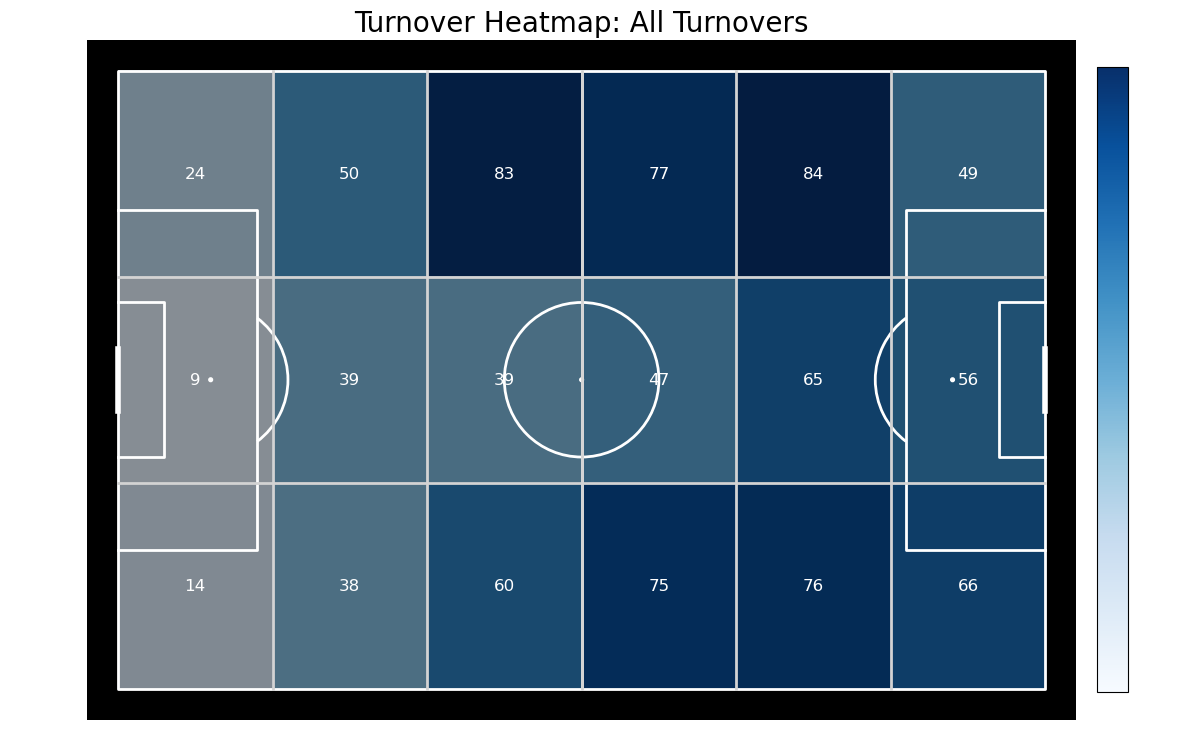

In [13]:
import matplotlib.colors as mcolors

def plot_turnover_heatmap(df, df_name):
    # Initialize the pitch
    pitch = Pitch(line_color = 'white', pitch_color = 'black')  
    fig, ax = pitch.draw(figsize = (12, 8))

    # StatsBomb pitch dimensions
    pitch_length = 120
    pitch_width = 80

    # Define 6x3 zones (18 zones)
    num_horizontal = 6  
    num_vertical = 3    
    zone_length = pitch_length / num_horizontal
    zone_width = pitch_width / num_vertical

    # Create a 2D array (matrix) filled with zeros initially to store turnover counts
    turnover_counts = np.zeros((num_vertical, num_horizontal))

    # Count turnovers per zone
    for _, row in df.iterrows():
        if isinstance(row["location"], list) and len(row["location"]) == 2:
            x, y = row["location"]

            # Determine zone index
            x_zone = int(x // zone_length)
            y_zone = int(y // zone_width)

            # Ensure within bounds
            x_zone = min(x_zone, num_horizontal - 1)
            y_zone = min(y_zone, num_vertical - 1)

            # Store in correct orientation
            turnover_counts[y_zone, x_zone] += 1

    # Get the max turnover count
    max_count = turnover_counts.max()

    # Fix: Explicitly normalize colormap so heatmap and color bar match
    cmap = plt.cm.Blues
    norm = mcolors.Normalize(vmin = 0, vmax = max_count)

    # Use imshow to overlay the heatmap while keeping pitch markings visible
    heatmap = ax.imshow(turnover_counts, cmap = cmap, alpha = 0.6, 
                        extent = [0, pitch_length, 0, pitch_width], origin = 'lower', 
                        norm = norm)  

    # The Key Fix: Use `ScalarMappable` so the color bar is perfectly in sync
    sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
    sm.set_array([])  # This prevents an unnecessary warning

    # Add a color bar with correct scaling
    cbar = fig.colorbar(sm, ax = ax, fraction = 0.03, pad = 0.02)
    cbar.set_label("Turnover Count", fontsize = 12, color = 'white')
    cbar.ax.yaxis.set_tick_params(color = 'white')
    plt.setp(cbar.ax.get_yticklabels(), color = "white")  

    # Ensure color bar max matches `max_count`
    cbar.set_ticks(np.linspace(0, max_count, num = 5, dtype = int))  

    # Add grid lines over the zones with neutral gray color and proper placement
    for x in range(1, num_horizontal):
        ax.plot([x * zone_length, x * zone_length], [0, pitch_width], color = 'lightgray', lw = 2)
    for y in range(1, num_vertical):
        ax.plot([0, pitch_length], [y * zone_width, y * zone_width], color = 'lightgray', lw = 2)

    # Add turnover count as text in each zone
    for x in range(num_horizontal):
        for y in range(num_vertical):
            text_x_pos = (x * zone_length) + (zone_length / 2)
            text_y_pos = (y * zone_width) + (zone_width / 2)
            count = turnover_counts[y, x]
            ax.text(text_x_pos, text_y_pos, int(count), ha = 'center', va = 'center', color = 'white', fontsize = 12)

    # Add a total turnovers label as header
    total_turnovers = turnover_counts.sum()
    ax.text(0.5, pitch_width + 5, f"Total Turnovers: {int(total_turnovers)}", 
            ha = 'center', va = 'center', color = 'white', fontsize = 14, fontweight = 'bold')

    # Add title
    plt.title(f"Turnover Heatmap: {df_name}", fontsize = 20, color = 'black')

    plt.show()

plot_turnover_heatmap(turnover_events_df, "All Turnovers")


In [ ]:
# WITH THE BALL
# TODO: How fast do they move into the final 3rd following turnovers? -> Differentiate between pass, carries, dribbles

passes_df = pd.DataFrame(all_events["passes"])
carrys_df = pd.DataFrame(all_events["carrys"])

# Filter only successful passes
passes_df = passes_df[passes_df["pass_outcome"] != "Incomplete"]

# Concatenate all ball progression events
progression_events_df = pd.concat([
    passes_df,
    carrys_df
])

# Ensure only Bayer Leverkusen ball progression 
progression_events_df = progression_events_df[(progression_events_df["possession_team"] == "Bayer Leverkusen") & (progression_events_df["team"] == "Bayer Leverkusen")]

# Create new timestamp column in seconds
progression_events_df["timestamp_seconds"] = progression_events_df["second"] + progression_events_df["minute"] * 60

# Filter for end locations of ball progression in the final sixth
progression_events_final_sixth_df = progression_events_df[
    progression_events_df["carry_end_location"].apply(lambda row: isinstance(row, list) and row[0] >= 100) |
    progression_events_df["pass_end_location"].apply(lambda row: isinstance(row, list) and row[0] >= 100)
]

# TODO: Fix this

# Merge progression in final sixth with turnovers
turnover_final_sixth_df = pd.merge(
    turnover_events_df,
    progression_events_final_sixth_df, 
    on = ["match_id"],
    suffixes = ('_turnover', '_final_sixth'),
    how = 'inner'
)

turnover_final_sixth_df = turnover_final_sixth_df.sort_values(by = ["match_id", "timestamp_seconds_turnover"])

def get_last_turnover(group):
    group['last_turnover_before_sixth'] = group.apply(
        lambda row: group[group['timestamp_seconds_turnover'] < row['timestamp_seconds_final_sixth']]['timestamp_seconds_turnover'].max() if not group[group['timestamp_seconds_turnover'] < row['timestamp_seconds_final_sixth']].empty else None,
        axis = 1
    )
    return group

turnover_final_sixth_df = turnover_final_sixth_df.groupby('match_id').apply(get_last_turnover)

turnover_final_sixth_df = turnover_final_sixth_df[turnover_final_sixth_df['timestamp_seconds_turnover'] == turnover_final_sixth_df['last_turnover_before_sixth']]

turnover_final_sixth_df = turnover_final_sixth_df.drop(columns = ["last_turnover_before_sixth"])

turnover_final_sixth_df.reset_index(drop = True, inplace = True)

turnover_final_sixth_df.head(50)

In [15]:
# TODO: Direction and style of play after general turnover, short passes forwards, switch play (long balls) or recycle possession (esp for the top third 55 66) ... ?
# TODO: The broader question is this, when Bayer Leverkusen score goals and get shit done, what is the opposite formation? Rest? Pressuring? Out of position (counterattack)?

In [16]:
# WITHOUT THE BALL
# Counterpressing (How long does it take them to regain the ball upon losing it? Does it vary based on different areas of the pitch?)
# Relationism ... rest positions of players without the ball 